### Assignment 5.

Author Jennifer Ibanez Cano

This notebook contains a program that simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender). 
The results of the winner and loser are reflected in the plots. 

![Risk](https://i0.wp.com/thepythoncodingbook.com/wp-content/uploads/2022/12/risk_board_game.jpg?fit=1263%2C833&ssl=1)

##### Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops.

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
    - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


[Rules of Risk](https://www.ultraboardgames.com/risk/game-rules.php?utm_content=cmp-true)

************

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# Roll n dice and return the results as a list.
def roll_dice(n):
    
    # We generate a list of n random integers between 1 and 6 (in np.random.randint(1, 7)
    # the higher bound (7) is exclusive and the lower bound (1) is inclusive)
    return [np.random.randint(1, 7) for _ in range(n)]

# Simulate a single battle round and return the number of troops lost by each side. 
def simulate_battle(attacker_dice, defender_dice):
    #attacker_dice =[3,5,4]   We sort it in descending order [5,4,3]
    #defender_dice =[2,4]      We sort it in descending order [4,2]  
    attacker_dice.sort(reverse=True)
    defender_dice.sort(reverse=True)
    
    attacker_losses = 0
    defender_losses = 0
    
    #We choose the minimum between the number of dice the attacker and the defender rolled,
    #this way if the number of dice ends we don't have to change the code
    for i in range(min(len(attacker_dice), len(defender_dice))):
        if attacker_dice[i] > defender_dice[i]:
            defender_losses += 1
        else:
            attacker_losses += 1
    
    return attacker_losses, defender_losses

# Simulate multiple battle rounds and return the cumulative results.

def simulate_battle_rounds(num_rounds):
    attacker_losses = []
    defender_losses = []
    
    for _ in range(num_rounds):
        attacker_dice = roll_dice(3) # The attacker can roll up to 3 dice  (that's the n in roll_dice)  
        #attacker_dice = [3,5,4]
        defender_dice = roll_dice(2)
        #defender_dice = [2,4]
        losses = simulate_battle(attacker_dice, defender_dice) #[0,2]
        attacker_losses.append(losses[0])
        defender_losses.append(losses[1])
    
    return attacker_losses, defender_losses

In [84]:
# Calculate the win probabilities for attackers and defenders based on the cumulative losses.
def calculate_win_probabilities(attacker_losses, defender_losses):
    num_rounds = len(attacker_losses)
    attacker_wins_probs = sum(attacker_losses[i] < defender_losses[i] for i in range(num_rounds))
    defender_wins_probs = sum(attacker_losses[i] > defender_losses[i] for i in range(num_rounds))
    tie_probs = sum(attacker_losses[i] == defender_losses[i] for i in range(num_rounds))
    
    attacker_win_prob = attacker_wins_probs / num_rounds
    defender_win_prob = defender_wins_probs / num_rounds
    tie_prob = tie_probs / num_rounds
    
    return attacker_win_prob, defender_win_prob, tie_prob

# Simulate 1000 battle rounds
attacker_losses, defender_losses = simulate_battle_rounds(1000)

# Calculate win probabilities
attacker_win_prob, defender_win_prob, tie_prob = calculate_win_probabilities(attacker_losses, defender_losses)

In [85]:
# Checking the results of the simulation.
print(f"Attacker win probability: {attacker_win_prob:.2f}")
print(f"Defender win probability: {defender_win_prob:.2f}")
print(f"Tie probability: {tie_prob:.2f}")

Attacker win probability: 0.36
Defender win probability: 0.30
Tie probability: 0.34


In [86]:
# Number of rounds where the attacker lost troops
print (attacker_losses)
print (len([i for i in attacker_losses if i>0]))
print (len([i for i in attacker_losses if i==1]))
print (len([i for i in attacker_losses if i==2]))

[2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 

In [87]:
# Number of rounds where the defender lost troops
print (defender_losses)
print (len([i for i in defender_losses if i==0]))
print (len([i for i in defender_losses if i==1]))
print (len([i for i in defender_losses if i==2]))

[0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 

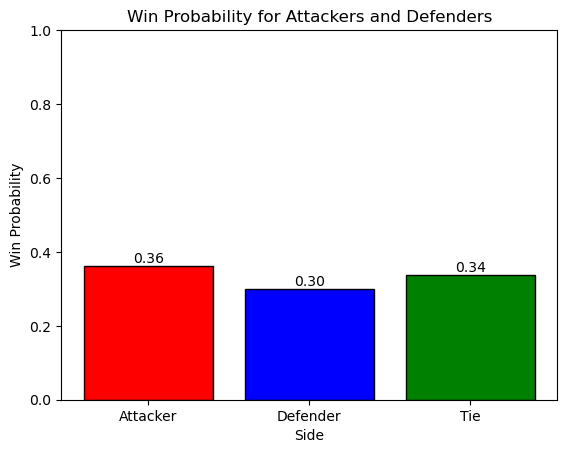

In [88]:
# Plot the win probabilities
labels = ['Attacker', 'Defender', 'Tie']
probabilities = [attacker_win_prob, defender_win_prob, tie_prob]

plt.bar(labels, probabilities, color =["red", "blue", "green"], edgecolor = "black")
plt.xlabel('Side')
plt.ylabel('Win Probability')
plt.title('Win Probability for Attackers and Defenders')
plt.ylim(0, 1)
plt.text(0, attacker_win_prob, f"{attacker_win_prob:.2f}", ha='center', va='bottom')
plt.text(1, defender_win_prob, f"{defender_win_prob:.2f}", ha='center', va='bottom')
plt.text(2, tie_prob, f"{tie_prob:.2f}", ha='center', va='bottom')  
plt.show()

With this plot we can see that everytime that we run the program the results will show the attacker as a winner, close by the option tie and then the defender side. ALthough the attacker shows as the winner the defender probabilities are very close too. 

A different version where the program simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out, and plots the results.

In [89]:
# six troops each, and attacker can use up to 3 troops in a battle round and defender up to 2 troops

#example AT:6 DE:6
#1st round AT [3,5,4] DF [4,4] --> DF loses 1, AT loses 1--> AT:5 DE:5
#2nd round AT [1,3,6] DF [1,2] --> DF loses 2, AT loses 0--> AT:5 DE:3
#3rd round AT [1,2,3] DF [1,4] --> DF loses 1, AT loses 1--> AT:4 DE:2
#4th round AT [1,2,6] DF [2,3] --> DF loses 1, AT loses 1--> AT:3 DE:1
#5th round AT [1,2,5] DF [3]   --> DF loses 1, AT loses 0--> AT:2 DE:0

#AT wins

def simulate_battle_rounds_second(num_rounds):
    wins = []
    for _ in range(num_rounds):
        #We start each round with 6 troops each
        attacker_troops = 6
        defender_troops = 6

        existingTroops = True #We will use this variable to check if any player has no troops left and continue the game (while loop)
        while existingTroops:
            attacker_dice = roll_dice(min(attacker_troops, 3)) # The attacker can roll up to 3 dice  (that's the n in roll_dice)  
            #attacker_dice = [3,5,4]
            defender_dice = roll_dice(min(defender_troops, 2)) # The defender can roll up to 2 dice, it will choose the smallest between the number of defender_troops and 2
            #defender_dice = [2,4]
            losses = simulate_battle(attacker_dice, defender_dice) #losses == [0,2]
            #we subtract the losses from each player
            attacker_troops = attacker_troops - losses[0]
            defender_troops = defender_troops - losses[1]
            #Check if any player has no troops left
            if attacker_troops == 0:
                existingTroops = False
                wins.append("D")
            elif defender_troops == 0:
                existingTroops = False
                wins.append("A")    
            #if both players have troops left, we continue with the next round  
        
    return wins

In [90]:
# Calculate the win probabilities for attackers and defenders based on the cumulative losses.
def calculate_win_probabilities(wins):
    num_rounds = len(wins)
    attacker_wins_probs = wins.count("A")
    defender_wins_probs = wins.count("D")
    
    attacker_win_prob = attacker_wins_probs / num_rounds
    defender_win_prob = defender_wins_probs / num_rounds
    
    return attacker_win_prob, defender_win_prob

# Simulate 1000 battle rounds
wins = simulate_battle_rounds_second(1000)

## Calculate win probabilities
attacker_win_prob2, defender_win_prob2 = calculate_win_probabilities(wins)

print(wins)
print(attacker_win_prob2)
print(defender_win_prob2)

['D', 'D', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'A', 'A', 'A', 'D', 'D', 'D', 'A', 'D', 'A', 'D', 'D', 'D', 'D', 'A', 'D', 'A', 'A', 'D', 'D', 'A', 'A', 'D', 'A', 'D', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'D', 'A', 'A', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'D', 'A', 'D', 'A', 'D', 'D', 'A', 'D', 'D', 'A', 'D', 'D', 'A', 'D', 'A', 'D', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'D', 'A', 'D', 'A', 'D', 'A', 'D', 'D', 'D', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'D', 'D', 'A', 'A', 'A', 'D', 'A', 'A', 'D', 'A', 'A', 'A', 'D', 'D', 'A', 'D', 'D', 'A', 'D', 'A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'A', 'D', 'A', 'D', 'A', 'A', 'A', 'A', 'A', 'D', 'A', 'D', 'A', 'D', 'A', 'D', 'A', 'A', 'D', 'D', 'A', 'A', 'A', 'D', 'A', 'A', 'D', 'D', 'D', 'A', 'D', 'A', 'D', 'D', 'A', 'A', 'D', 'A',